In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
%time
train = pd.read_csv("../input/jane-street-market-prediction/train.csv",nrows=1e5)
test = pd.read_csv("../input/jane-street-market-prediction/example_test.csv")

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs


In [3]:
train.head(10)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
5,0,0.000000,-0.001047,-0.002700,0.000743,0.004667,0.001282,-1,-1.499681,-1.928023,...,NaN,0.337112,4.079450,0.613967,6.622410,0.799525,5.231833,0.360831,3.922324,5
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,-1,-3.172026,-3.093182,...,NaN,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,6
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,-1,0.446050,-0.466210,...,NaN,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,7
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,NaN,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8
9,0,0.160117,0.005976,0.004345,0.023712,0.035360,0.020317,1,2.744408,1.412127,...,NaN,1.796860,3.177064,0.999252,2.906432,1.589816,2.435999,1.472419,2.245991,9


In [4]:
temp = pd.DataFrame(train.isna().sum().sort_values(ascending=False)*100/train.shape[0],columns=['missing %']).head(20)
temp.style.background_gradient(cmap='Purples')

,missing %
feature_28,15.669000
feature_27,15.669000
feature_17,15.669000
feature_18,15.669000
feature_7,15.577000
feature_8,15.577000
feature_102,12.770000
feature_72,12.770000
feature_108,12.770000
feature_78,12.770000


In [5]:
train=train[train['weight']!=0]
train['action']=(train['resp']>0)*1
train.action.value_counts()

1    40437
0    37322
Name: action, dtype: int64

In [6]:
#plot_features(train,features=[f'feature_{i}' for i in range(25)])

In [7]:
#plot_features(train,features=[f'feature_{i}' for i in range(25,50)])

In [8]:
#plot_features(train,features=[f'feature_{i}' for i in range(50,75)])

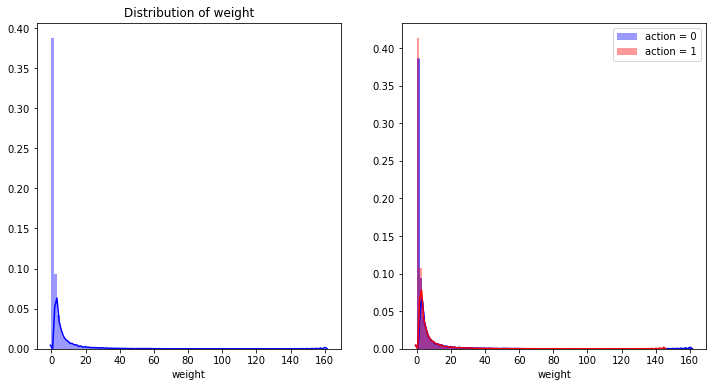

In [9]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Distribution of weight")
sns.distplot(train['weight'],color='blue',kde=True,bins=100)

t0 = train[train['action']==0]
t1 =  train[train['action']==1]
plt.subplot(1,2,2)
sns.distplot(train['weight'],color='blue',kde=True,bins=100)
sns.distplot(t0['weight'],color='blue',kde=True,bins=100,label='action = 0')
sns.distplot(t1['weight'],color='red',kde=True,bins=100,label='action = 1')
plt.legend()

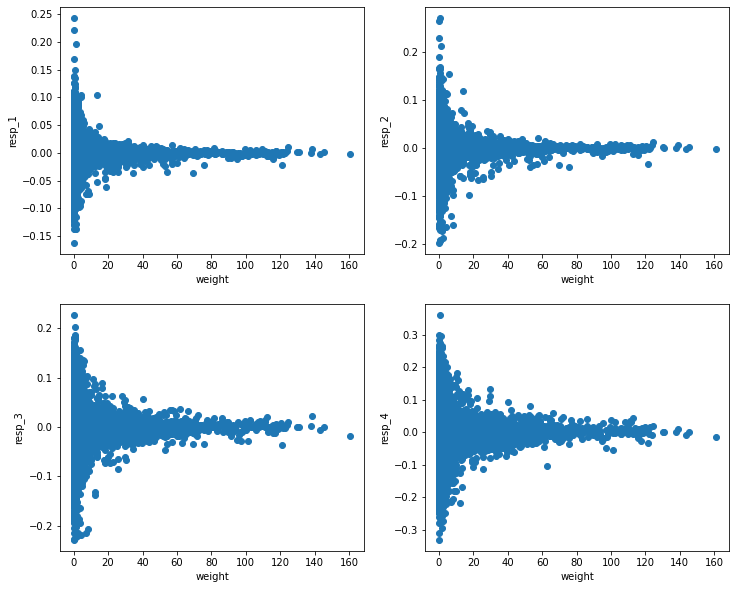

In [10]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
for i,col in enumerate([f'resp_{i}' for i in range(1,5)]):
    plt.subplot(2,2,i+1)
    plt.scatter(train[train.weight!=0].weight,train[train.weight!=0][col])
    plt.ylabel(col)
    plt.xlabel('weight')
plt.show()

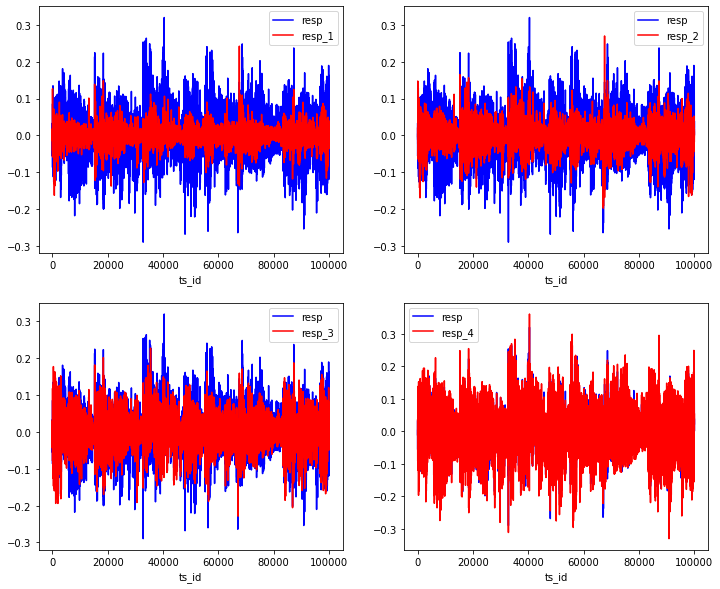

In [11]:
def plot_resp():
    fig,ax = plt.subplots(2,2,figsize=(12,10))
    i=1
    for col in ([f'resp_{i}' for i in range(1,5)]):
        
        plt.subplot(2,2,i)
        plt.plot(train.ts_id.values,train.resp.values,label='resp',color='blue')
        plt.plot(train.ts_id.values,train[f'resp_{i}'].values,label=f'resp_{i}',color='red')
        plt.xlabel('ts_id')
        plt.legend()
        
        i+=1
    plt.show()
    
plot_resp()

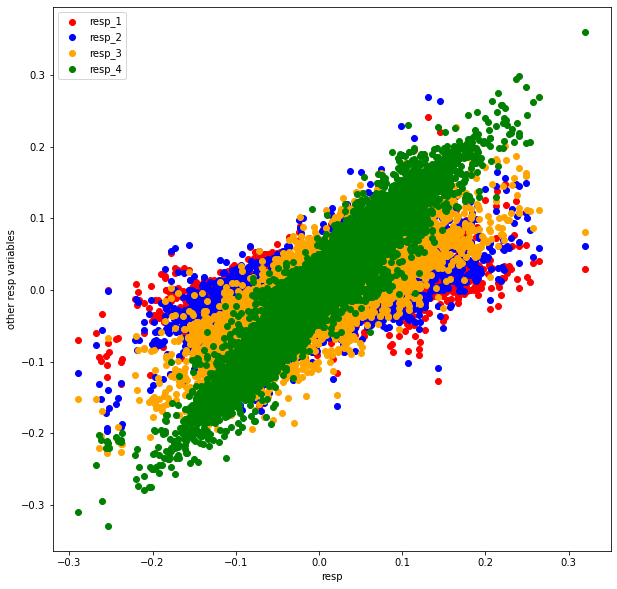

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(train.resp.values,train.resp_1.values,color='red',label='resp_1')
plt.scatter(train.resp.values,train.resp_2.values,color='blue',label='resp_2')
plt.scatter(train.resp.values,train.resp_3.values,color='orange',label='resp_3')
plt.scatter(train.resp.values,train.resp_4.values,color='green',label='resp_4')
plt.xlabel("resp")
plt.ylabel('other resp variables')
plt.legend()

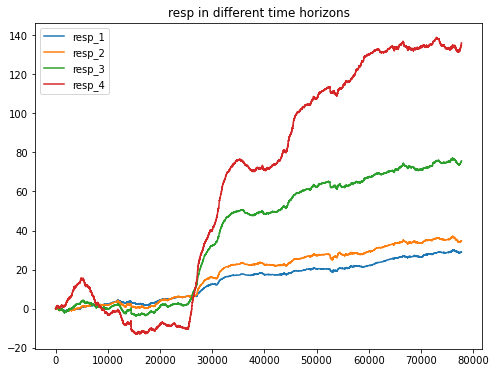

In [13]:
plt.figure(figsize=(8,6))
for col in [f'resp_{i}' for i in range(1,5)]:
    plt.plot(train[col].cumsum().values,label=col)   
plt.legend()
plt.title("resp in different time horizons")
plt.show()

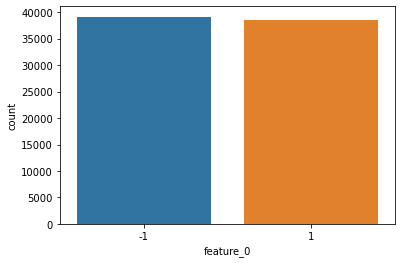

In [14]:
sns.countplot(train.feature_0)

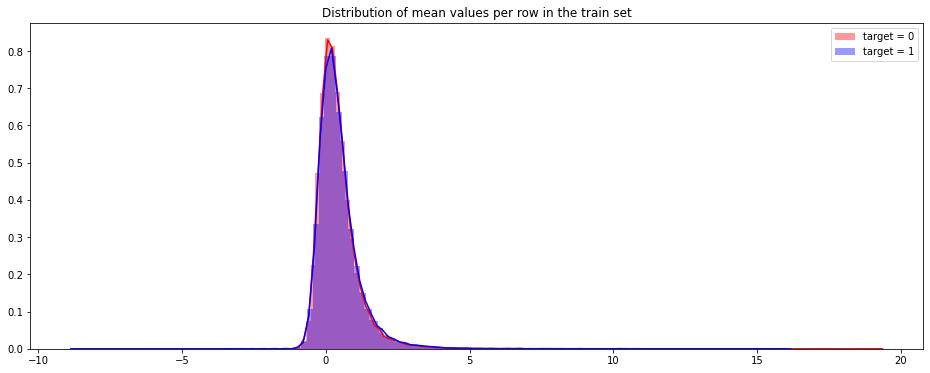

In [15]:
features = [col for col in train.columns if 'feature' in col]
t0 = train.loc[train['action'] == 0]
t1 = train.loc[train['action'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

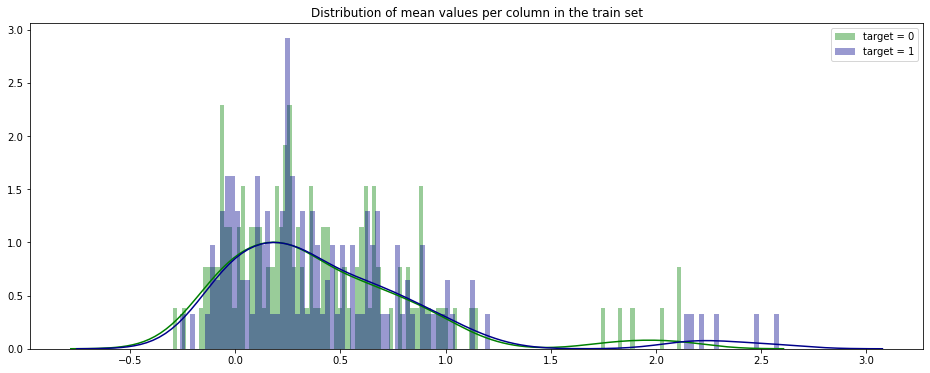

In [16]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

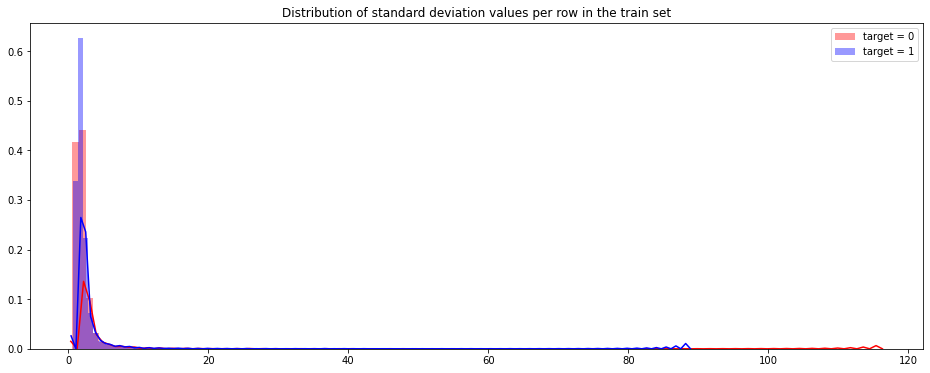

In [17]:
features = [col for col in train.columns if 'feature' in col]
t0 = train.loc[train['action'] == 0]
t1 = train.loc[train['action'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation values per row in the train set")
sns.distplot(t0[features].std(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

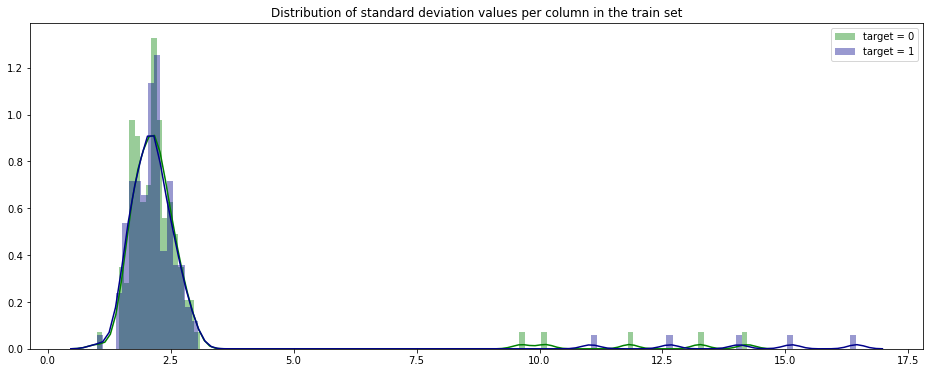

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation values per column in the train set")
sns.distplot(t0[features].std(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

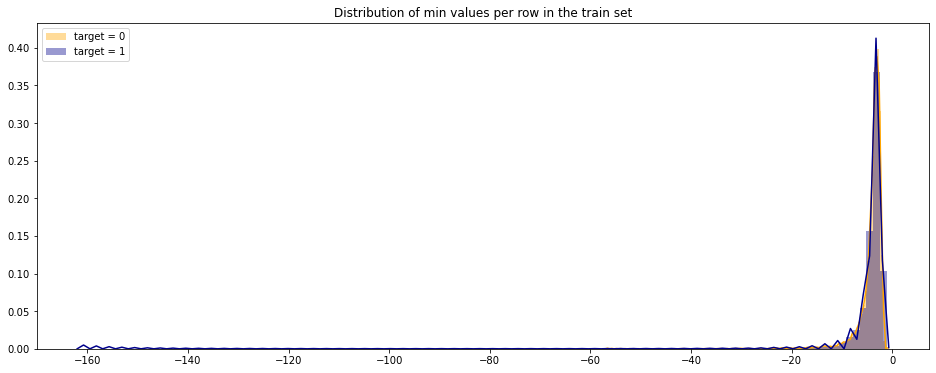

In [19]:
t0 = train.loc[train['action'] == 0]
t1 = train.loc[train['action'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per row in the train set")
sns.distplot(t0[features].min(axis=1),color="orange", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=1),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

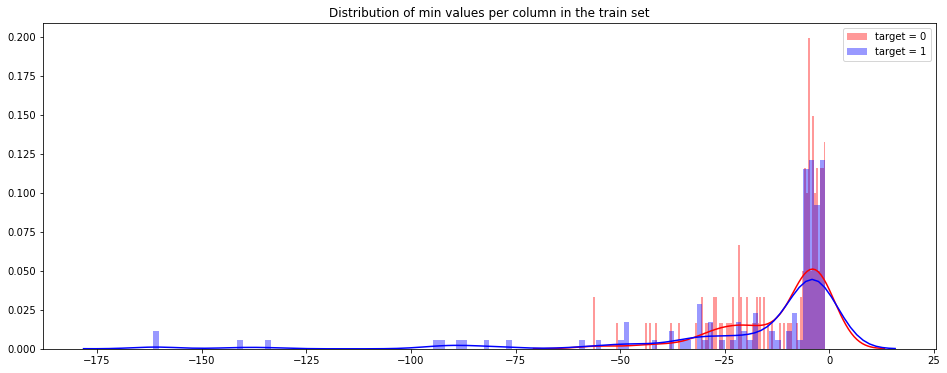

In [20]:
plt.figure(figsize=(16,6))
plt.title("Distribution of min values per column in the train set")
sns.distplot(t0[features].min(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].min(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

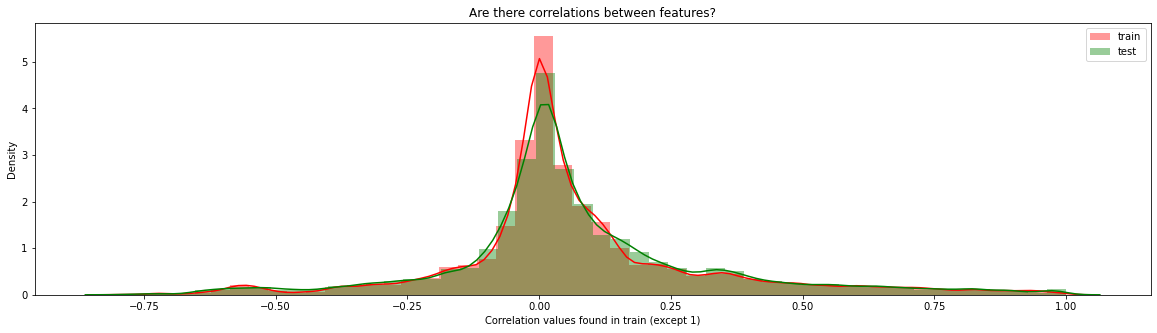

In [21]:
train_corr = train[features].corr().values.flatten()
train_corr = train_corr[train_corr!=1]
test_corr = test[features].corr().values.flatten()
test_corr = test_corr[test_corr!=1]


plt.figure(figsize=(20,5))
sns.distplot(train_corr, color="Red", label="train")
sns.distplot(test_corr, color="Green", label="test")
plt.xlabel("Correlation values found in train (except 1)")
plt.ylabel("Density")
plt.title("Are there correlations between features?"); 
plt.legend();

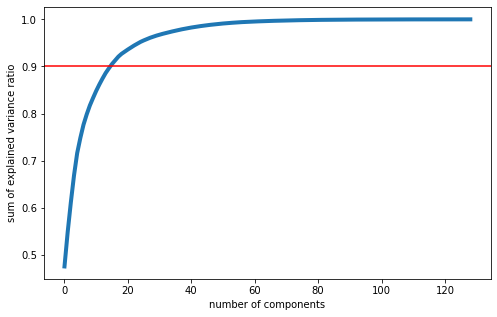

In [22]:
plt.figure(figsize=(8,5))
pca = PCA().fit(train[features].iloc[:,1:].fillna(train.fillna(train.mean())))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linewidth=4)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel("number of components")
plt.ylabel("sum of explained variance ratio")
plt.show()

Text(0, 0.5, 'pca comp 2')

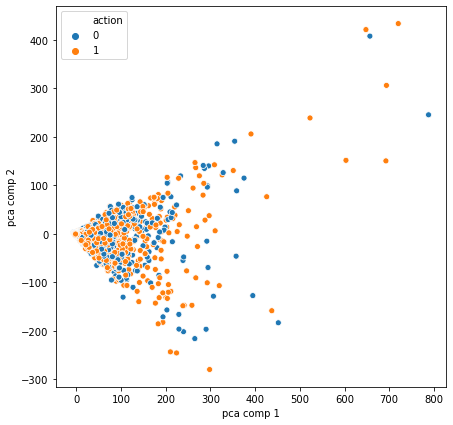

In [23]:
rb = RobustScaler()
data = rb.fit_transform(train[features].iloc[:,1:].fillna(train[features].fillna(train[features].mean())))
data = PCA(n_components=2).fit_transform(data)
plt.figure(figsize=(7,7))
sns.scatterplot(data[:,0],data[:,1],hue=train['action'])
plt.xlabel('pca comp 1')
plt.ylabel('pca comp 2')

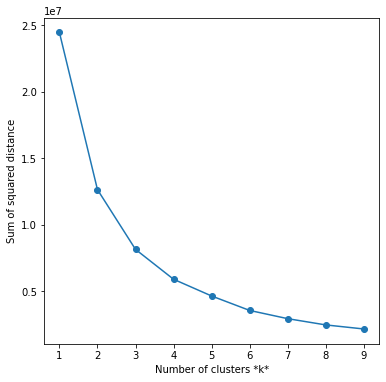

In [24]:
from sklearn.cluster import KMeans
X_std = train[[f'feature_{i}' for i in range(1,130)]].fillna(train.mean()).values
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

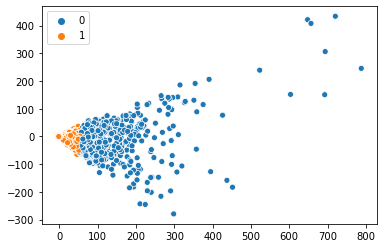

In [25]:
knn = KMeans(n_clusters=2)
labels=knn.fit_predict(data)
sns.scatterplot(data[:,0],data[:,1],hue=labels)

In [26]:
target='action'
cols_drop = list(np.setdiff1d(train.columns,test.columns))+['ts_id','date']

clf = RandomForestClassifier()
clf.fit(train.drop(cols_drop,axis=1).fillna(-999),train['action'])

RandomForestClassifier()

In [27]:
top=20
top_features = np.argsort(clf.feature_importances_)[::-1][:top]
feature_names = train.drop(cols_drop,axis=1).iloc[:,top_features].columns

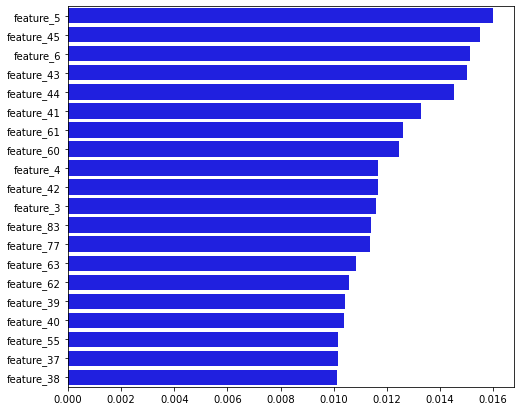

In [28]:
plt.figure(figsize=(8,7))
sns.barplot(clf.feature_importances_[top_features],feature_names,color='blue')

In [29]:
top=8
top_features = np.argsort(clf.feature_importances_)[::-1][:top]
top_features = train.drop(cols_drop,axis=1).iloc[:,top_features].columns

<Figure size 432x288 with 0 Axes>

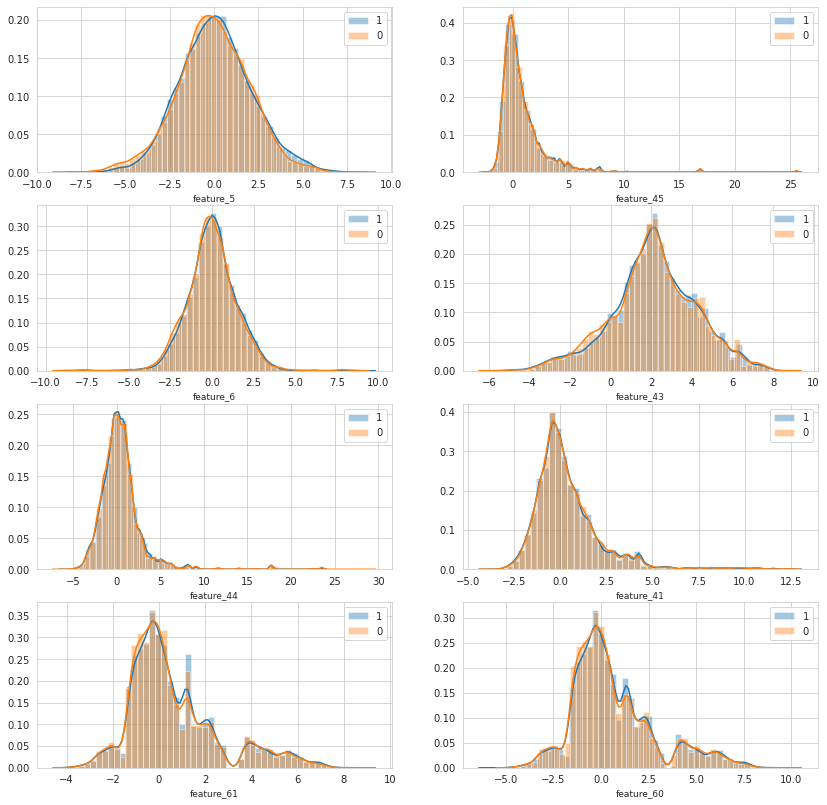

In [30]:
def plot_features(df1,target='action',features=[]):
    
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,2,figsize=(14,14))
    
    
    for feature in features:
        i += 1
        plt.subplot(4,2,i)
        sns.distplot(df1[df1[target]==1][feature].values,label='1')
        sns.distplot(df1[df1[target]==0][feature].values,label='0')
        plt.xlabel(feature, fontsize=9)
        plt.legend()
    
    plt.show();
    
plot_features(train,features=top_features)

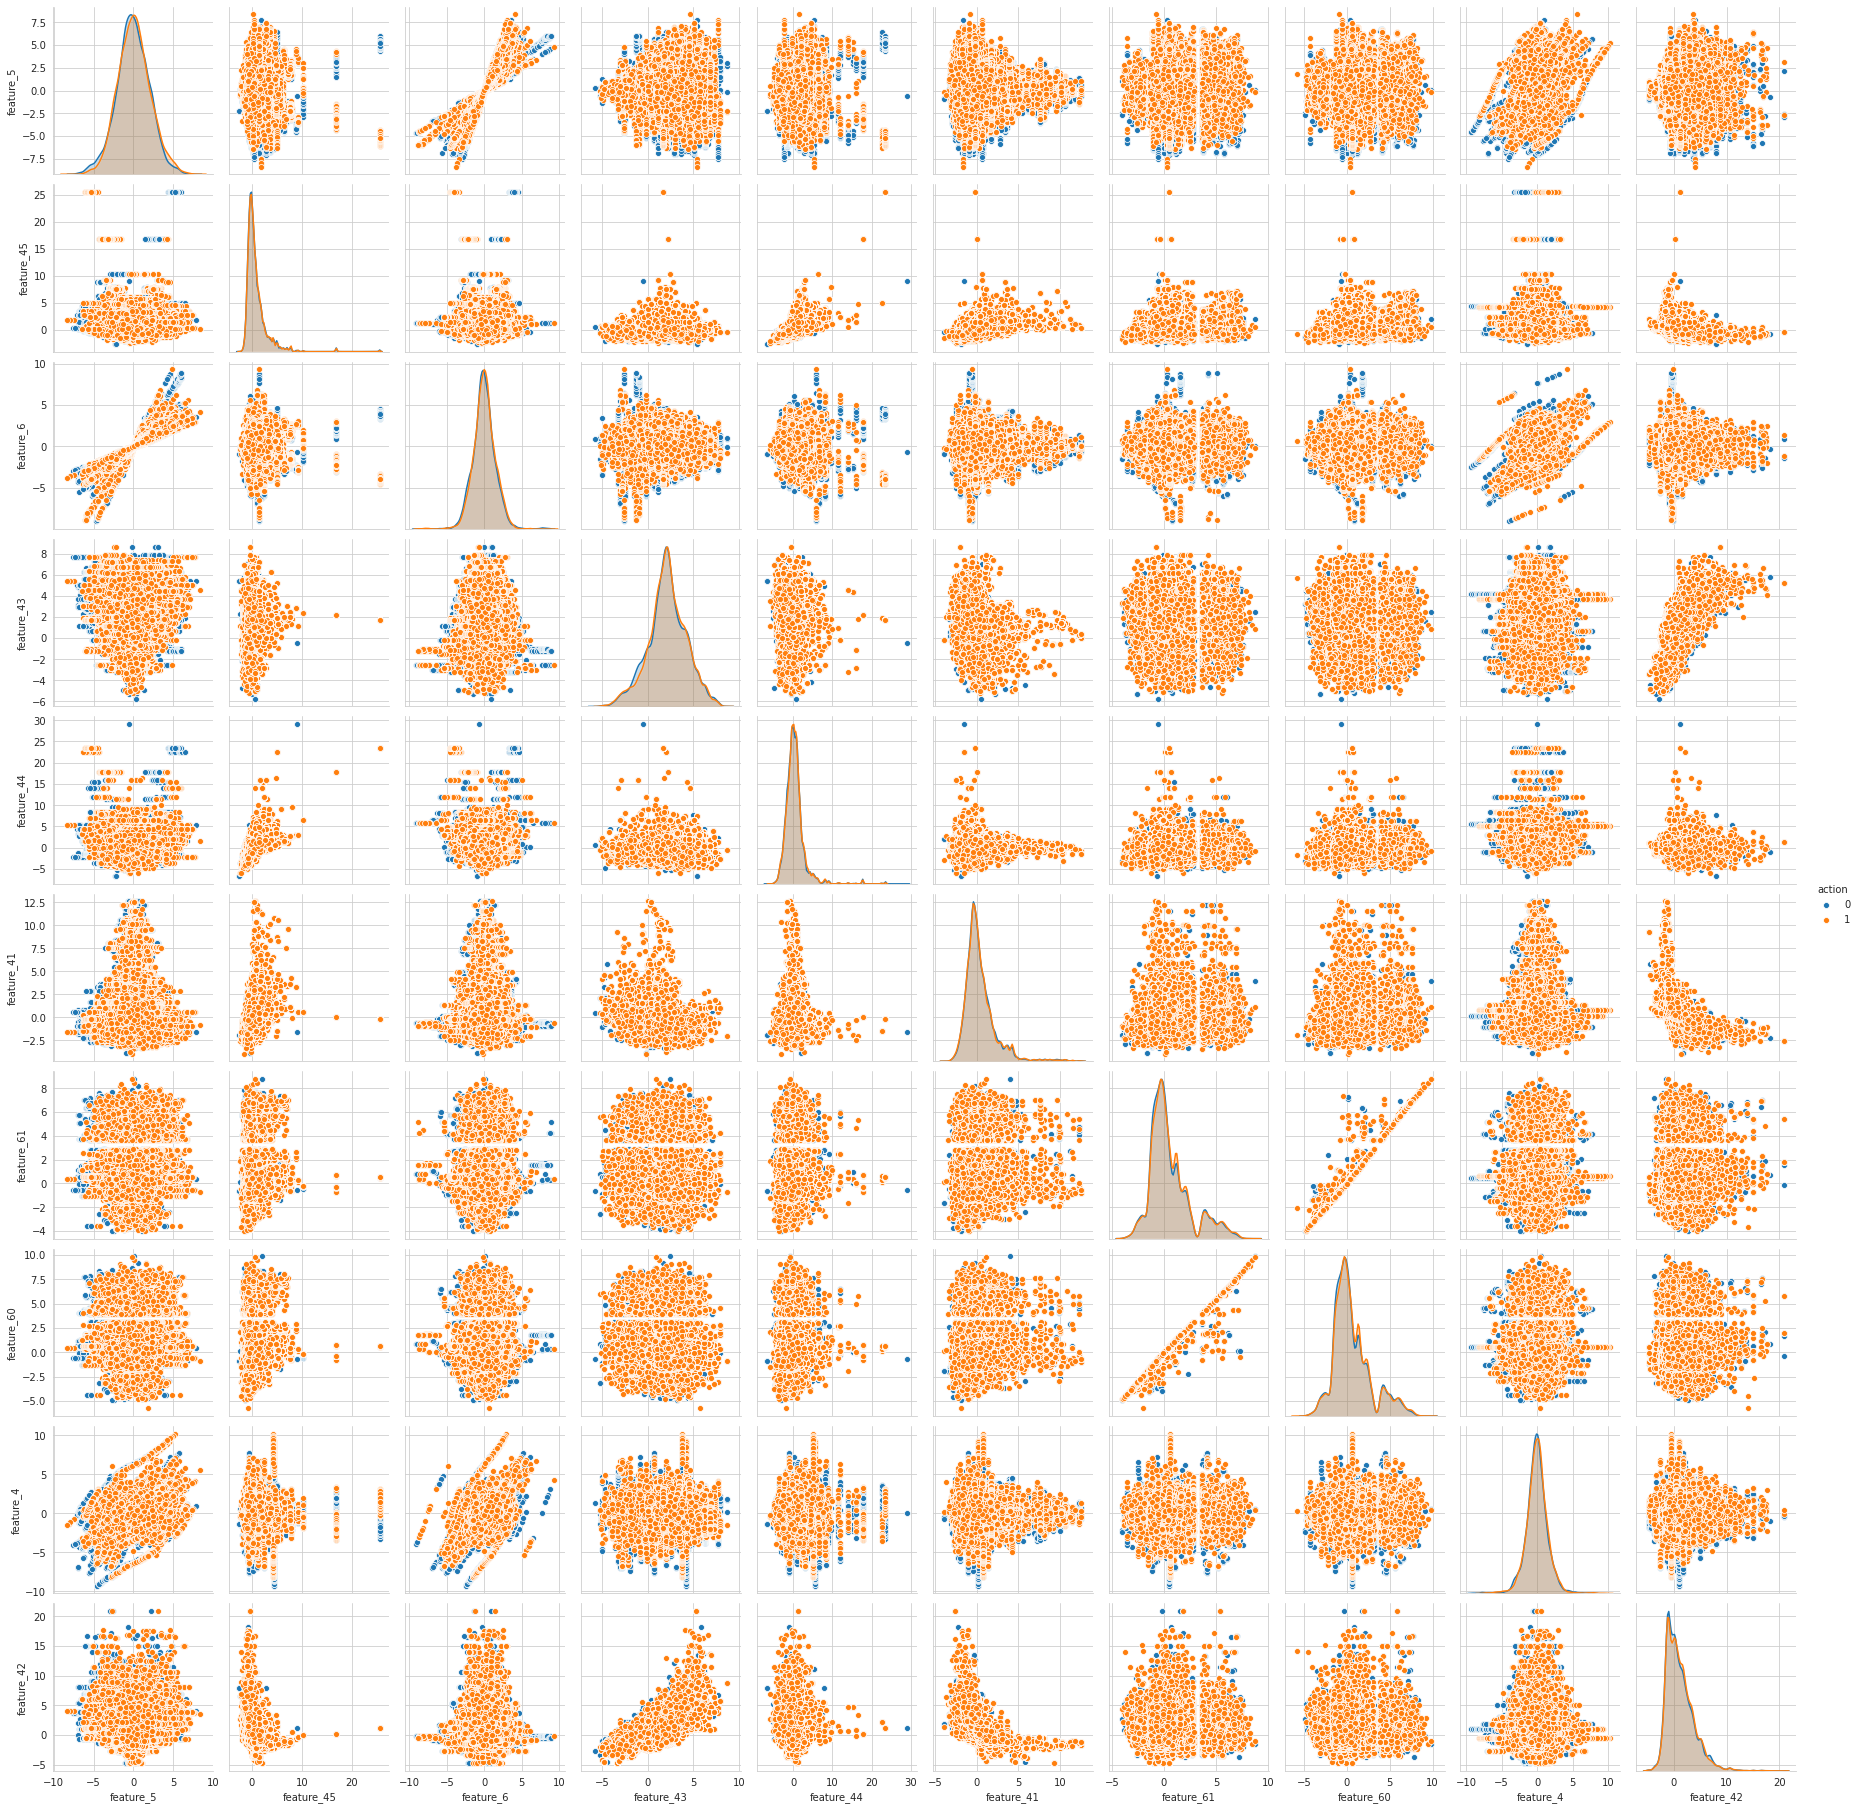

In [31]:
sns.pairplot(train[list(feature_names[:10])+['action']],hue='action')

In [32]:
import shap

In [33]:
explainer = shap.TreeExplainer(clf)
X = train.drop(cols_drop,axis=1).fillna(-999).sample(1000)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


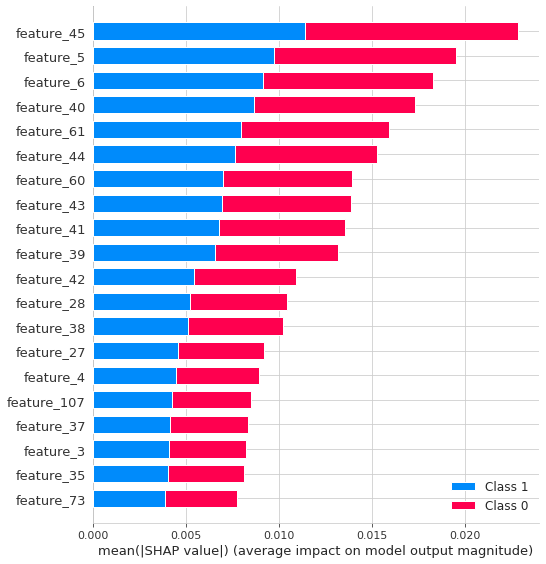

In [34]:
shap.summary_plot(shap_values, X, plot_type="bar")

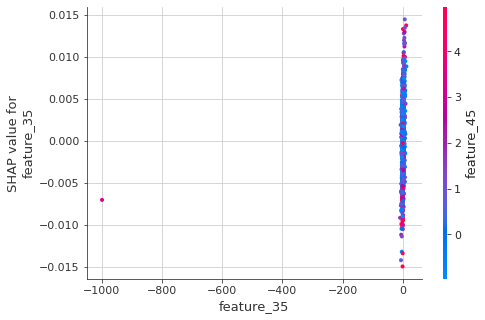

In [35]:
shap.dependence_plot('feature_35', shap_values[1], X, display_features=X.sample(1000))